In [92]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew, kurtosis, shapiro
import seaborn as sns

In [93]:
import matplotlib as mpl

mpl.rcParams['text.color'] = 'w'
mpl.rcParams['xtick.color'] = 'w'
mpl.rcParams['ytick.color'] = 'w'
mpl.rcParams['axes.labelcolor'] = 'w'
mpl.rcParams['axes.facecolor'] = '#323232'

In [130]:
# be sure to check OTGLY stock
start_date = "2010-01-01"
end_date = "2020-01-01"
stocks = "AZN FB AAPL PYPL DIS MSFT GOOGL"
data = yf.download(stocks, start=start_date, end=end_date, group_by="ticker")

[*********************100%***********************]  7 of 7 completed


In [95]:
data = data.loc[:, pd.IndexSlice[:, 'Adj Close']]
data.columns = data.columns.get_level_values(0)

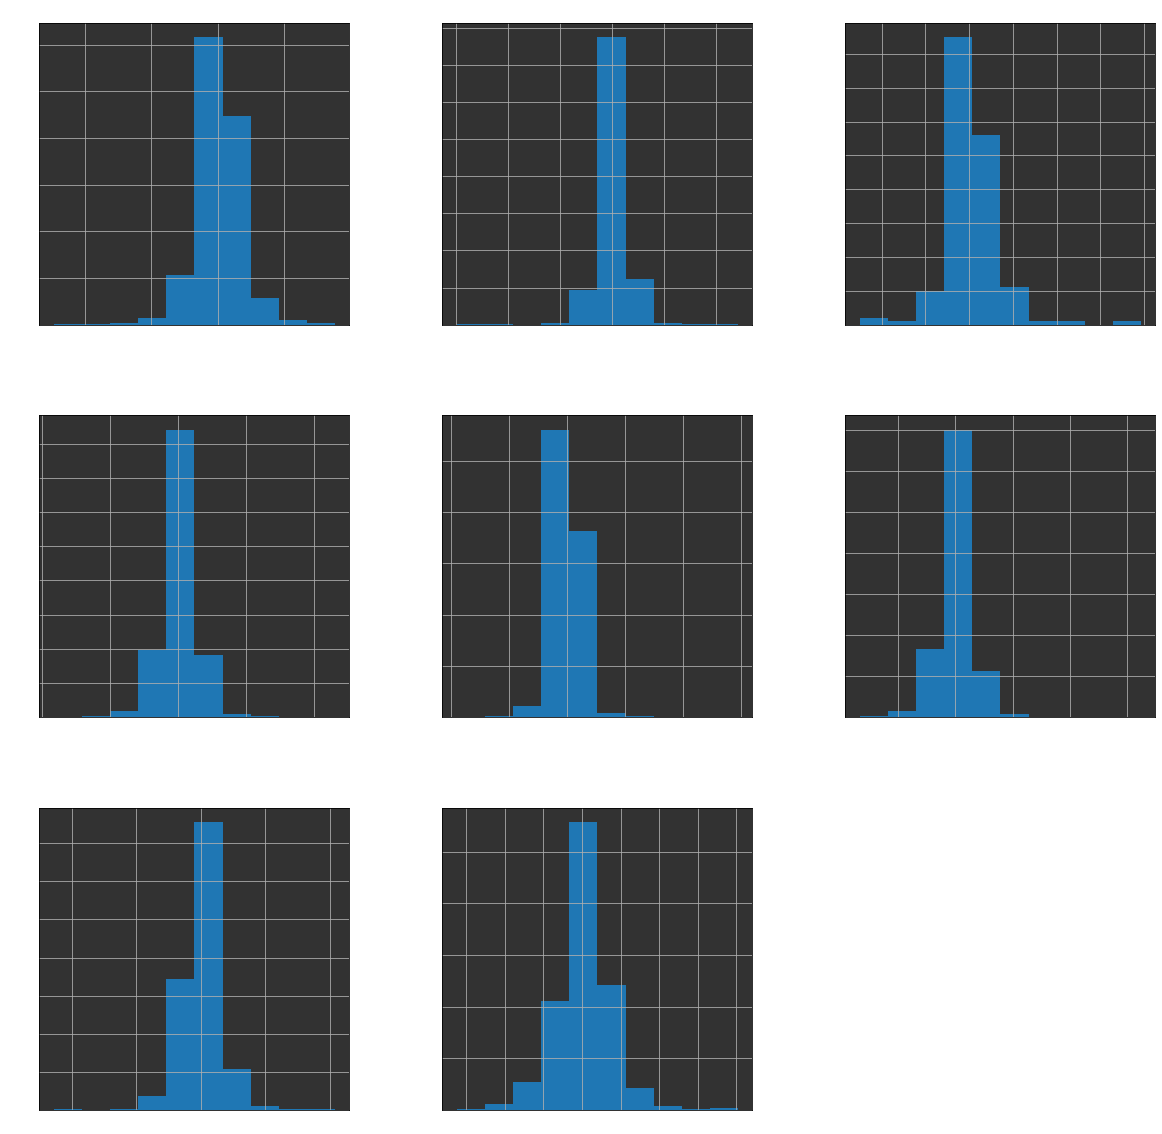

In [96]:
return_data = data.pct_change()
return_data.hist(figsize=(20, 20))
plt.show()

In [97]:
annualized_mean_return = ((1 + return_data.mean()) ** 252) - 1
annualized_return_variance = (return_data.std() * np.sqrt(252)) ** 2 
annualized_mean_return
print("Mu: {}, Variance: {}".format(annualized_mean_return, annualized_return_variance))

Mu: AZN      0.202710
FB       0.330336
GOOGL    0.192259
DIS      0.204722
BYND     1.009388
PYPL     0.325329
MSFT     0.239076
AAPL     0.316833
dtype: float64, Variance: AZN      0.050516
FB       0.130855
GOOGL    0.059247
DIS      0.044278
BYND     1.013046
PYPL     0.082103
MSFT     0.051622
AAPL     0.066292
dtype: float64


In [98]:
# a positive skewness suggests better return
skew(return_data.dropna())

array([ 0.81154838, -0.80954488,  1.13770993,  0.80534431,  1.12650368,
        0.27721558, -0.50665317, -0.71916539])

In [99]:
# excess kurtosis = kurtosis + 3
kurtosis(return_data.dropna()) + 3

array([ 6.32919774,  5.58166528, 14.74638993,  9.33951609, 13.04711148,
        6.30863857,  3.67808136,  4.9234498 ])

In [100]:
# check normal distribution
shapiro(return_data['PYPL'].dropna())

(0.9603368043899536, 5.580969725794047e-17)

In [101]:
# BYND is not so familiar to you
del return_data['BYND']

In [105]:
equal_weights = np.full(7, 0.125)

In [106]:
equal_weighted_return = return_data * equal_weights
equal_weighted_return

,AZN,FB,GOOGL,DIS,PYPL,MSFT,AAPL
Date,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.001252,NaN,0.001365,-0.000698,NaN,0.001927,0.001946
2010-01-05,-0.002531,NaN,-0.000550,-0.000312,NaN,0.000040,0.000216
2010-01-06,-0.000996,NaN,-0.003151,-0.000664,NaN,-0.000767,-0.001988
2010-01-07,0.001356,NaN,-0.002910,0.000039,NaN,-0.001300,-0.000231
...,...,...,...,...,...,...,...
2019-12-24,-0.000050,-0.000643,-0.000574,0.000527,0.000092,-0.000024,0.000119
2019-12-26,-0.000050,0.001627,0.001677,0.000353,0.001219,0.001025,0.002480
2019-12-27,0.001479,0.000186,-0.000718,0.000043,-0.000399,0.000228,-0.000047


In [107]:
# lengths are not equal, kinda meaningless
return_sum = equal_weighted_return.sum(axis=0)
# equal_weighted_return.isna().sum()
return_count = equal_weighted_return.notna().sum()
return_sum.div(return_count)


AZN      0.000092
FB       0.000142
GOOGL    0.000087
DIS      0.000092
PYPL     0.000140
MSFT     0.000106
AAPL     0.000137
dtype: float64

In [108]:
cumulative_stock_return = ((1 + equal_weighted_return).cumprod() - 1)
cumulative_stock_return

,AZN,FB,GOOGL,DIS,PYPL,MSFT,AAPL
Date,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.001252,NaN,0.001365,-0.000698,NaN,0.001927,0.001946
2010-01-05,-0.001283,NaN,0.000814,-0.001009,NaN,0.001968,0.002162
2010-01-06,-0.002277,NaN,-0.002340,-0.001673,NaN,0.001199,0.000170
2010-01-07,-0.000924,NaN,-0.005243,-0.001634,NaN,-0.000102,-0.000062
...,...,...,...,...,...,...,...
2019-12-24,0.254207,0.301545,0.240318,0.258124,0.168594,0.301277,0.397105
2019-12-26,0.254144,0.303663,0.242399,0.258568,0.170019,0.302611,0.400570
2019-12-27,0.256000,0.303906,0.241506,0.258622,0.169553,0.302908,0.400504


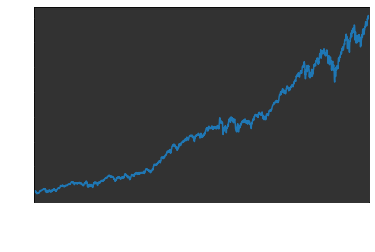

In [121]:
equal_return = return_data.mul(equal_weights, axis=1).sum(axis=1)
cumulative_equal_return = ((1 + total_return).cumprod() - 1)
cumulative_equal_return.plot()
plt.show()

In [131]:
stock_list = [stock for stock in stocks.split()]
company_cap = np.array([])
for item in stock_list:
    try:
        cap = yf.Ticker(item).info['marketCap']
        company_cap = np.append(company_cap, cap)
        print(item, cap)
    except:
        cap = 'None'
        company_cap = np.append(company_cap, cap)
        print(item, cap)


AZN 131689717760
FB 599107567616
AAPL 1369743949824
PYPL 140156993536
DIS 250902003712
MSFT 1358364409856
GOOGL 1019948433408


In [132]:
company_cap
total_cap = company_cap[company_cap != np.array(None)].sum()
company_cap

array([1.31689718e+11, 5.99107568e+11, 1.36974395e+12, 1.40156994e+11,
       2.50902004e+11, 1.35836441e+12, 1.01994843e+12])

In [133]:
market_cap_weights = company_cap[company_cap != np.array(None)] / total_cap
market_cap_weights
return_data

,AZN,FB,GOOGL,DIS,PYPL,MSFT,AAPL
Date,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.010013,NaN,0.010920,-0.005581,NaN,0.015420,0.015565
2010-01-05,-0.020249,NaN,-0.004404,-0.002495,NaN,0.000323,0.001729
2010-01-06,-0.007966,NaN,-0.025209,-0.005314,NaN,-0.006137,-0.015906
2010-01-07,0.010851,NaN,-0.023280,0.000314,NaN,-0.010400,-0.001849
...,...,...,...,...,...,...,...
2019-12-24,-0.000401,-0.005141,-0.004590,0.004216,0.000737,-0.000191,0.000951
2019-12-26,-0.000401,0.013017,0.013418,0.002822,0.009752,0.008197,0.019840
2019-12-27,0.011836,0.001492,-0.005747,0.000343,-0.003189,0.001828,-0.000380


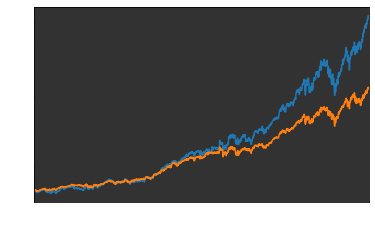

6.015470078963688

In [147]:
market_cap_weights
market_cap_total_return = return_data.mul(market_cap_weights, axis=1).sum(axis=1)
cumulative_market_cap_return = (1 + market_cap_total_return).cumprod() - 1
cumulative_market_cap_return.plot()
cumulative_equal_return.plot()
plt.show()

In [135]:
correlation_matrix = return_data.corr()

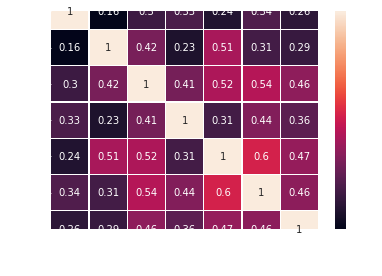

In [136]:
sns.heatmap(correlation_matrix,
            annot=True,
            linewidths=0.3,
            annot_kws={"size": 10})
plt.xticks(rotation=45)
plt.yticks(rotation=0) 
plt.show()

In [137]:
# Annulize the result
cov_matrix = return_data.cov() * 252

In [138]:
portfolio_volatility = np.sqrt(np.dot(market_cap_weights.T, np.dot(cov_matrix, market_cap_weights)))
print(portfolio_volatility)

0.1896827588886066


In [145]:
np.random.seed(113)
n = 7
rand_nos = np.random.rand(1000, n)
rand_nos.sum(axis=1)
onehundred_by_n = rand_nos.transpose() / rand_nos.sum(axis=1) # This is a 100 x 1 array
random_weights = onehundred_by_n.transpose() # This is now a n x 100 array
random_weights

array([[0.2241288 , 0.01944156, 0.23542652, ..., 0.03358773, 0.15148889,
        0.2210997 ],
       [0.08880397, 0.14202873, 0.13972812, ..., 0.15912818, 0.13117903,
        0.1961363 ],
       [0.02789104, 0.20471355, 0.21409254, ..., 0.21514819, 0.13683296,
        0.13291941],
       ...,
       [0.26246571, 0.0684117 , 0.15312015, ..., 0.21337147, 0.16232808,
        0.04257145],
       [0.03102293, 0.15955367, 0.15208339, ..., 0.25223329, 0.21709947,
        0.11113177],
       [0.0138171 , 0.13916582, 0.16170632, ..., 0.08309242, 0.12074881,
        0.24309121]])

In [226]:
portfolios = []
target_weights_index = 0
for i in range(1000):
    total_return = return_data.mul(random_weights[i], axis=1).sum()
    total_volatility = np.sqrt(np.dot(random_weights[i].T, np.dot(cov_matrix, random_weights[i])))
    portfolio = (total_return.mean(), total_volatility)
    portfolios.append(portfolio)

In [227]:
portfolios = pd.DataFrame(portfolios, columns=['return', 'volatility'])
weights = pd.DataFrame(random_weights, columns=["AZN", "FB", "GOOGL", "DIS", "PYPL", "MSFT", "AAPL"])

In [228]:
portfolios = pd.concat([weights, portfolios], axis=1)
portfolios['sharp_ratio'] = (portfolios['return'] - 0) / portfolios['volatility']

In [232]:
# max sharp ratio
msr = portfolios[portfolios['sharp_ratio'] ==portfolios['sharp_ratio'].max()]
msr_weights = msr.iloc[0, 0:7]

# global minimum volatility
gmv = portfolios[portfolios['volatility'] ==portfolios['volatility'].min()]
gmv_weights = gmv.iloc[0, 0:7]

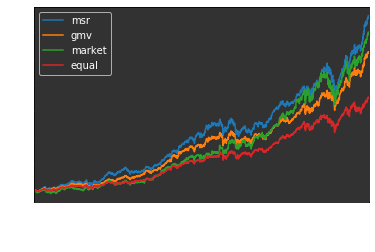

In [239]:
cumulative_msr_return = return_data.mul(msr_weights, axis=1).sum(axis=1)
cumulative_msr_return = (1 + cumulative_msr_return).cumprod() - 1

cumulative_gmv_return = return_data.mul(gmv_weights, axis=1).sum(axis=1)
cumulative_gmv_return = (1 + cumulative_gmv_return).cumprod() - 1

return_plot = cumulative_msr_return.plot()
cumulative_gmv_return.plot(ax=return_plot)
cumulative_market_cap_return.plot(ax=return_plot)
cumulative_equal_return.plot(ax=return_plot)
return_plot.legend(['msr', 'gmv', 'market', 'equal'])
plt.show()